### Purpose: 
Script to plot some basic cone activation responses to spectra of single wavelength

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cone as c
import colorspace as cs

In [2]:
lmbda = np.linspace(350,720,100)
cL = list(map(c.cone_L,lmbda))
cM = list(map(c.cone_M,lmbda))
cS = list(map(c.cone_S,lmbda))

<IPython.core.display.Javascript object>


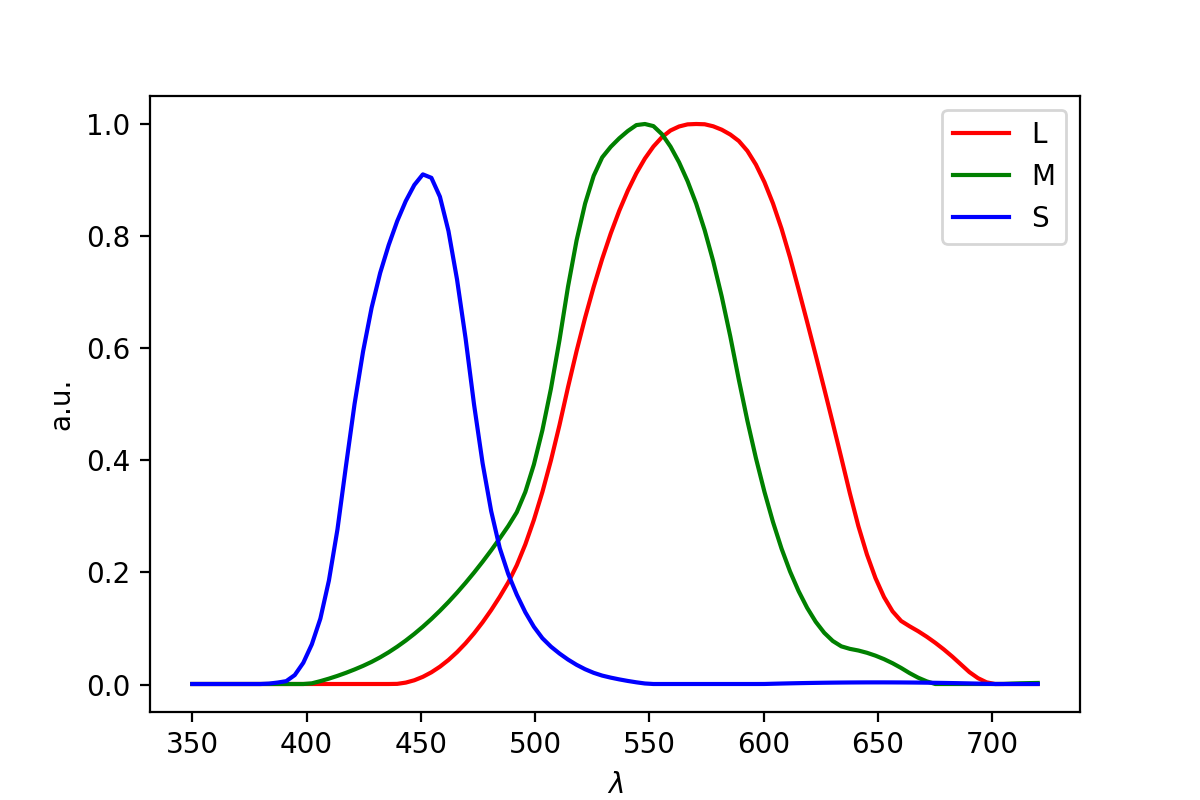

In [3]:
%matplotlib notebook
fig,ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
ax.plot(lmbda,cL, 'red')
ax.plot(lmbda,cM, 'green')
ax.plot(lmbda,cS, 'blue')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('a.u.')
ax.legend(['L','M','S'])
plt.savefig('results/cone_activation.pdf')

<IPython.core.display.Javascript object>


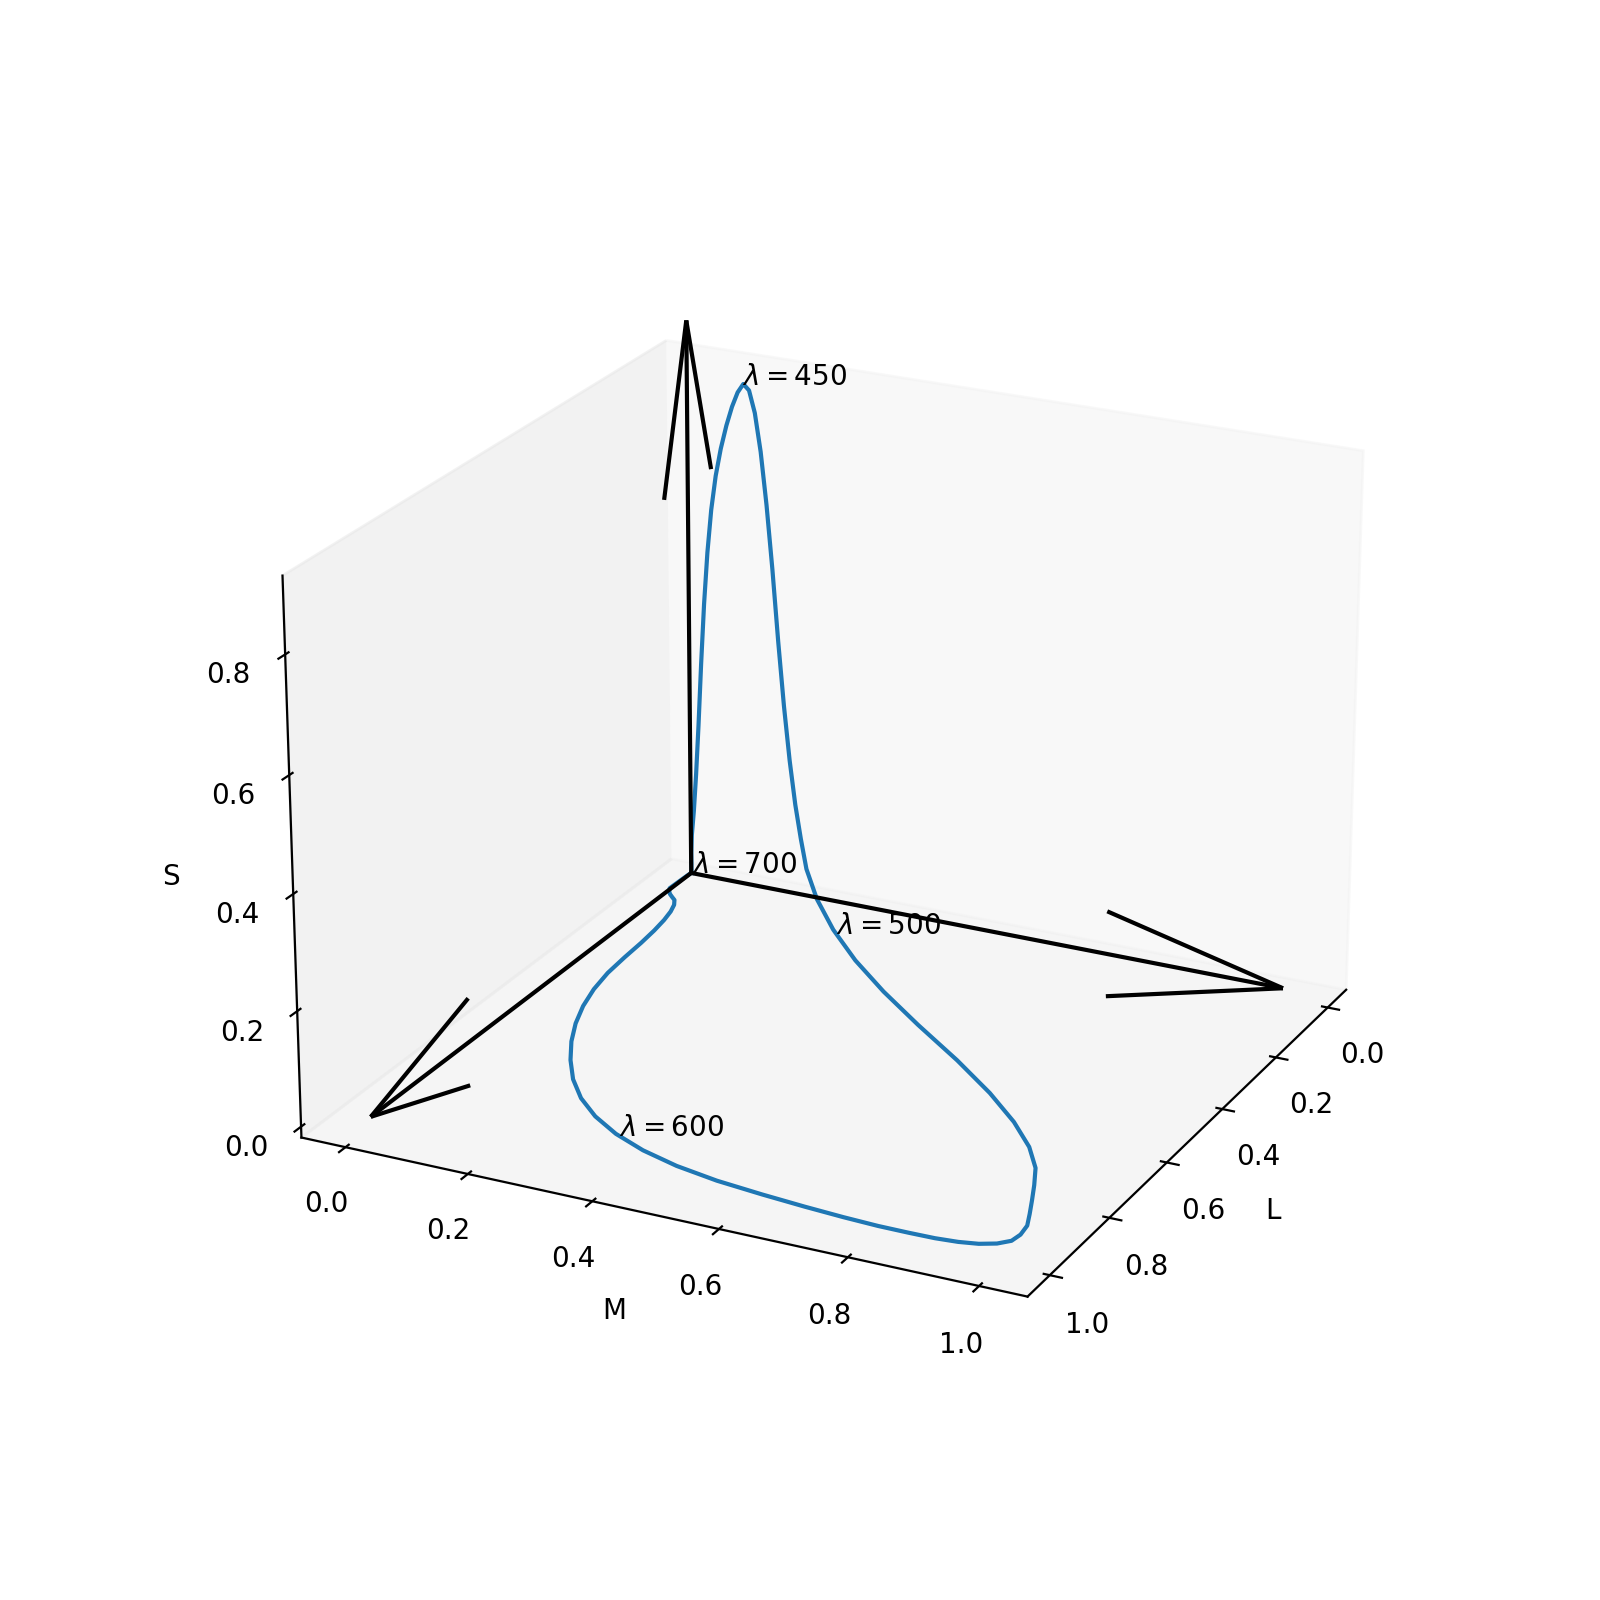

In [5]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

lblrange = np.asarray([450,500,600,700])
for lbl in lblrange:
    ax.text(c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl),'$\lambda=%d$'%(lbl))
ax.plot(cL,cM,cS)
ax.quiver(0,0,0, 1,0,0, color="black",length=1)
ax.quiver(0,0,0, 0,1,0, color="black",length=1)
ax.quiver(0,0,0, 0,0,1, color="black",length=1)
ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('S')
ax.grid(False)
ax.view_init(22.305194805197175, 26.266233766235814)
plt.show()
plt.savefig('results/cone_activation3d.pdf')

In [6]:
f = np.ones(lmbda.shape[0])
C = np.array([cL,cM,cS,f])

<IPython.core.display.Javascript object>


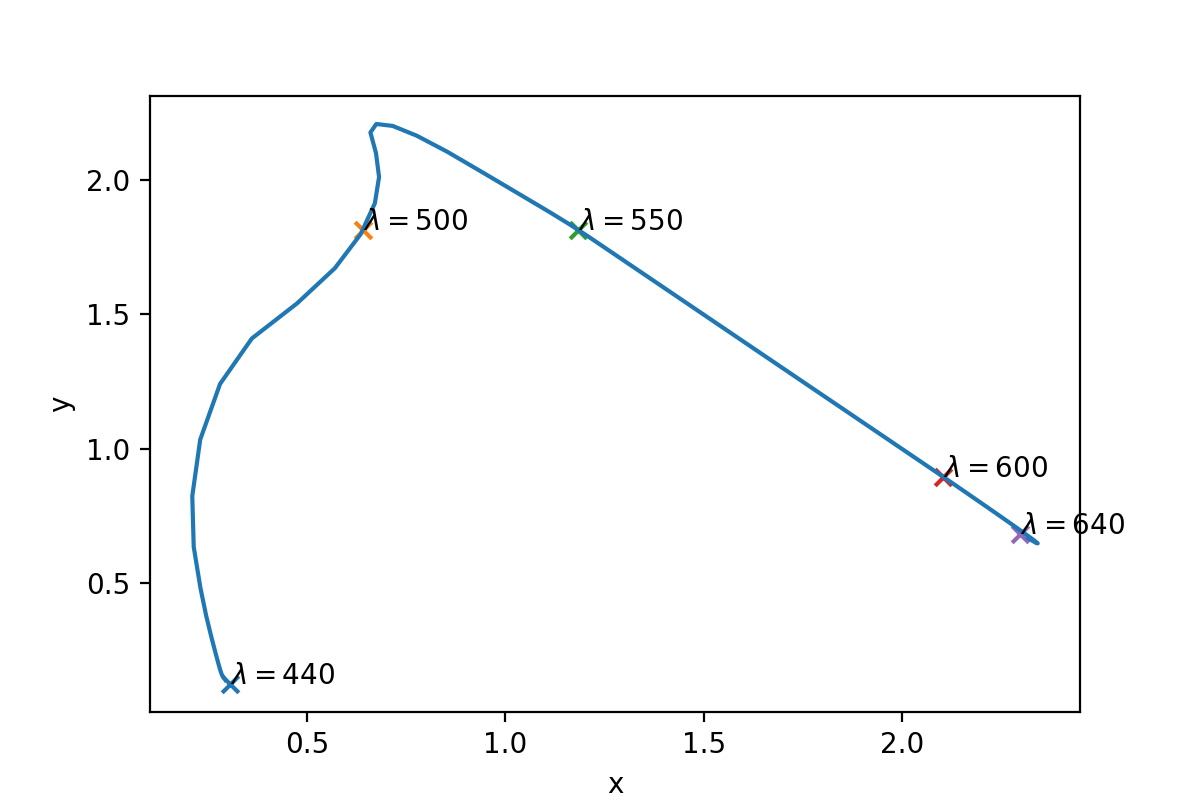

In [26]:
fig,ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
xyz = cs.LMStoxyz(np.array([cL,cM,cS]))
xyz_idx = (lmbda>440) * (lmbda < 640)
ax.plot(xyz[0,xyz_idx],xyz[1,xyz_idx])
ax.set_xlabel('x')
ax.set_ylabel('y')
lblrange = np.asarray([440,500, 550,600,640])
for lbl in lblrange:
    lblxyz = cs.LMStoxyz(np.array([c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl)]))
    ax.text(lblxyz[0],lblxyz[1],'$\lambda=%d$'%(lbl))
    ax.scatter(lblxyz[0],lblxyz[1],marker='x')

In [61]:
from scipy.linalg import solve, null_space

In [19]:
x = np.array([cL,cM,cS])

cs.LMStoXYZ(x[:,-1])

array([-0.00102789,  0.00216154,  0.001     ])

<IPython.core.display.Javascript object>


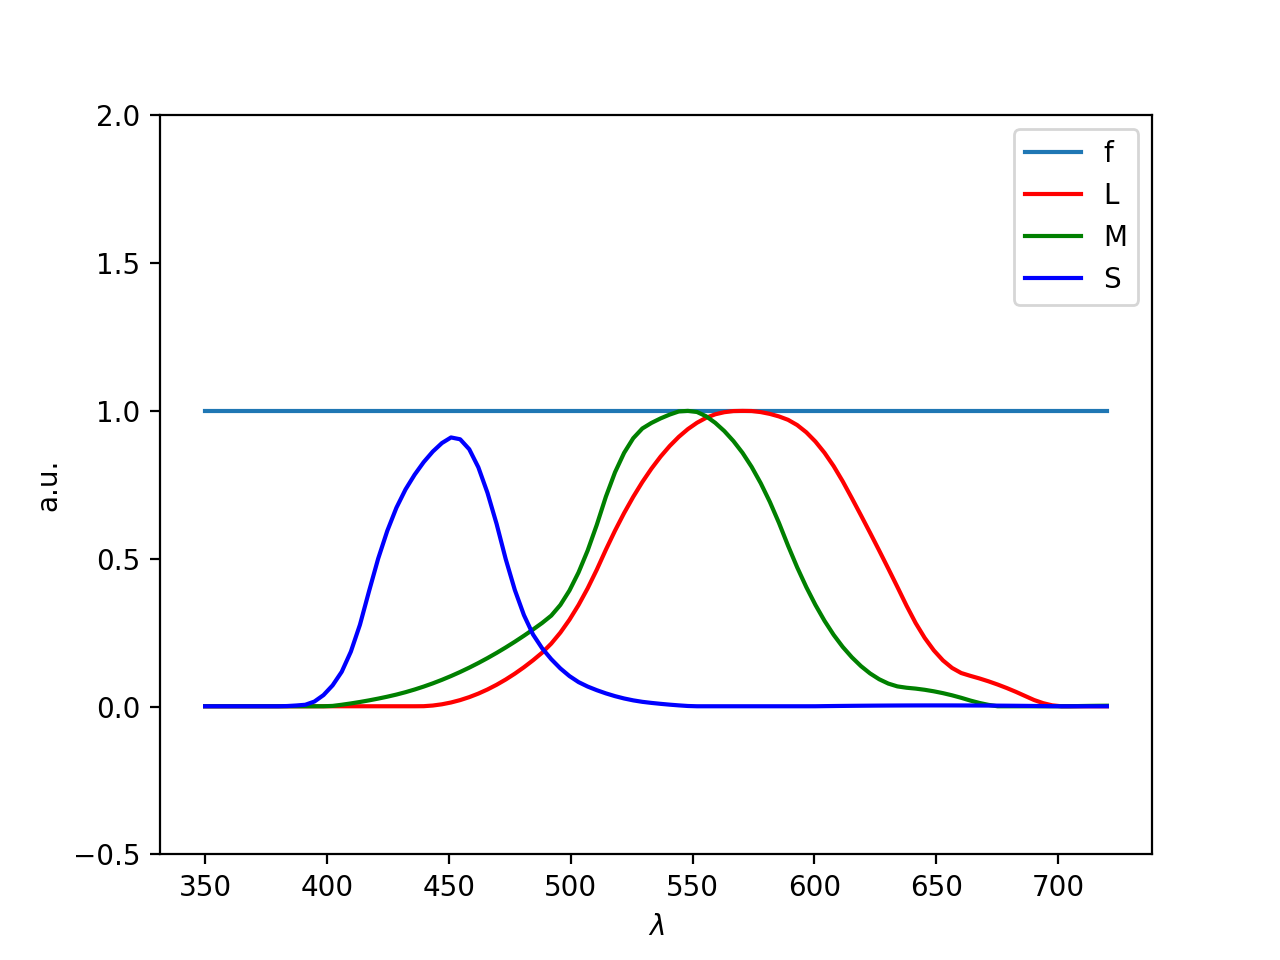

In [62]:
fig,ax = plt.subplots()
plt.plot(lmbda,f)

ax.plot(lmbda,cL, 'red')
ax.plot(lmbda,cM, 'green')
ax.plot(lmbda,cS, 'blue')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('a.u.')
ax.legend(['f', 'L','M','S'])
ax.set_ylim([-0.5,2])
plt.show()

In [63]:
C0 = C @ f

In [64]:
C0

array([ 31.94752638,  26.38409925,  14.335093  , 100.        ])

In [65]:
NC = null_space(C)

In [66]:
NC.shape

(100, 96)

In [67]:
NC[:,80:81].shape

(100, 1)

<IPython.core.display.Javascript object>


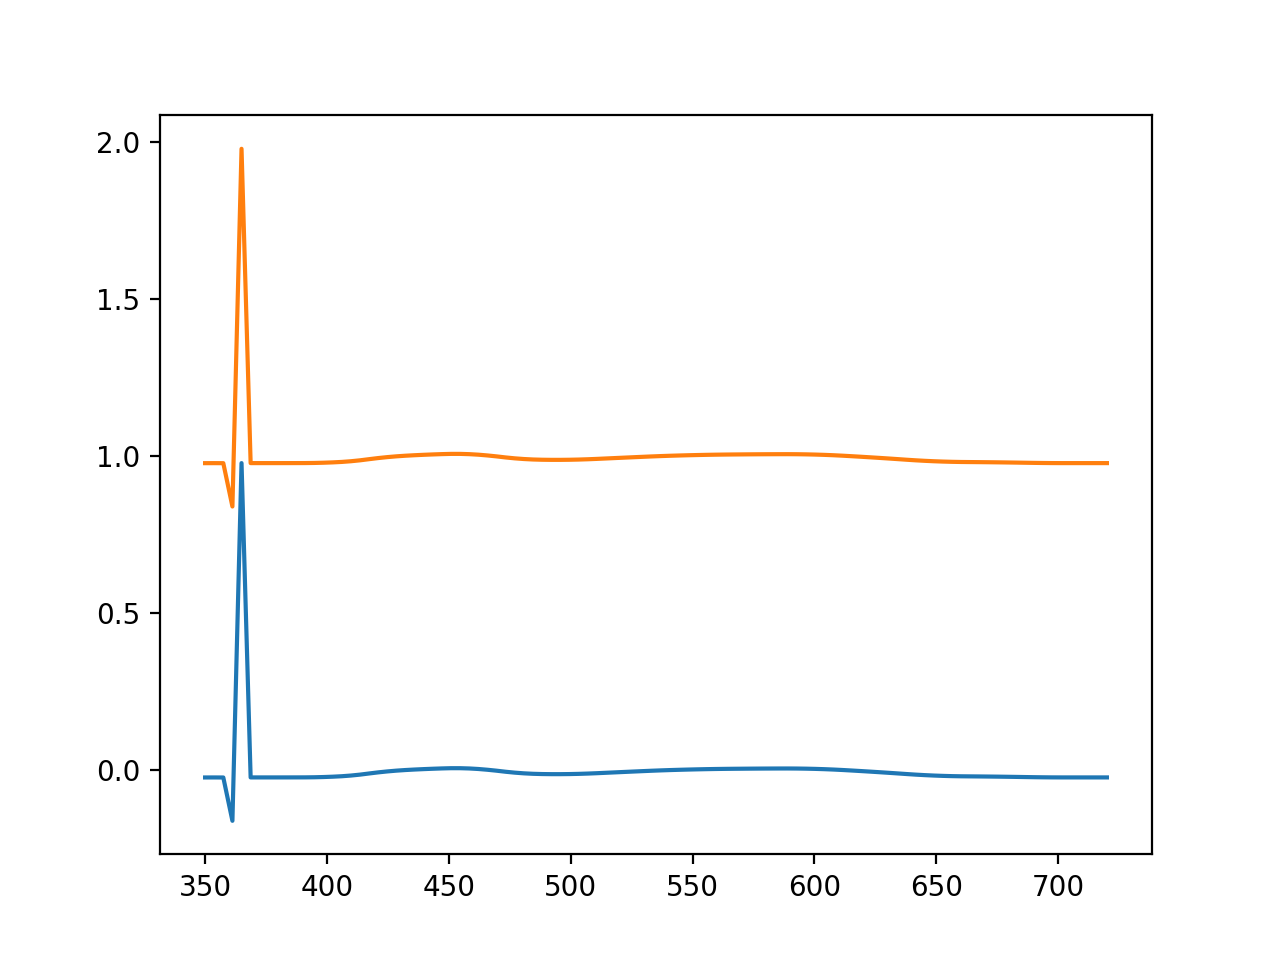

In [68]:
fig,ax = plt.subplots()
for nc in NC[:,0:1].T:
    plt.plot(lmbda, nc)
    
plt.show()

In [69]:
C @ nc

array([-1.24683250e-17, -3.10081821e-17, -4.33680869e-17, -4.44089210e-16])

In [70]:
plt.plot(lmbda, f + nc)
plt.show()

In [71]:
rand_pert = 5*(2*np.random.rand(NC.shape[1]) - 1)
ramp_pert = 5*(2*np.linspace(0,1,NC.shape[1]) - 1)

In [72]:
(f + nc).T @ (f + nc)

101.0

In [73]:
# pert = np.sum(NC @ np.diag(rand_pert),axis = 1)
pert = np.sum(NC @ np.diag(ramp_pert),axis = 1)

In [120]:
# f + pert > 0 for all lambda
# pert = a1*f1 + a2*f2 +...


<IPython.core.display.Javascript object>


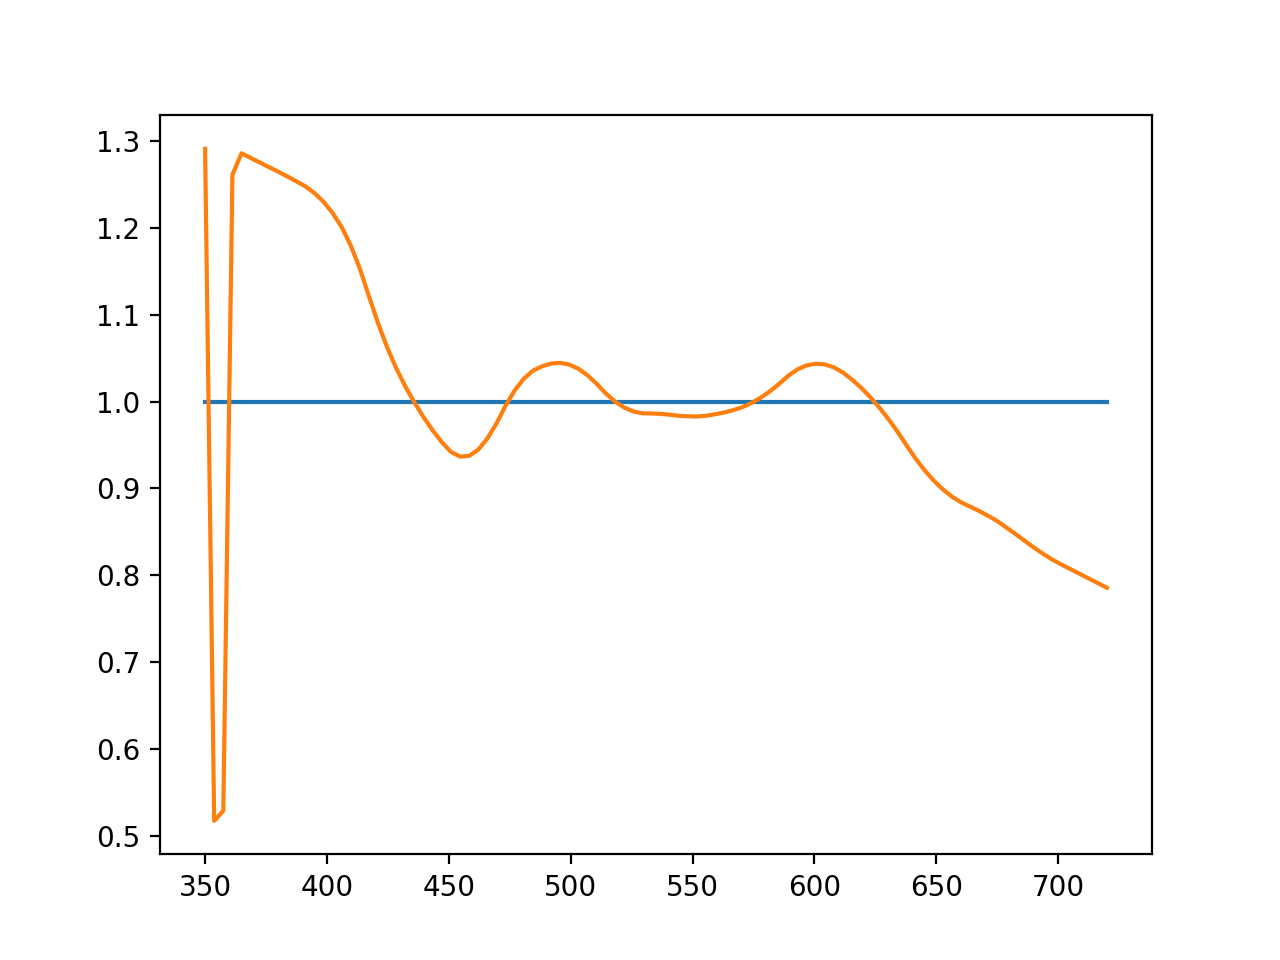

In [75]:
plt.figure()
# plt.plot(lmbda, pert)
plt.plot(lmbda, f)
plt.plot(lmbda, f - 0.05*pert)
plt.show()

In [36]:
C @ (f + pert)

array([322.13207104, 266.01629287, 144.07036518])

In [37]:
C @ f

array([322.13207104, 266.01629287, 144.07036518])

In [ ]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

lblrange = np.asarray([450,500,600,700])
for lbl in lblrange:
    ax.text(c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl),'$\lambda=%d$'%(lbl))
ax.plot(cL,cM,cS)
ax.quiver(0,0,0, 1,0,0, color="black",length=1)
ax.quiver(0,0,0, 0,1,0, color="black",length=1)
ax.quiver(0,0,0, 0,0,1, color="black",length=1)
ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('S')
ax.grid(False)
ax.view_init(22.305194805197175, 26.266233766235814)
plt.show()
plt.savefig('results/cone_activation3d.pdf')

In [ ]:
# Check column space instead...

In [38]:
q,r = np.linalg.qr(C)


In [39]:
q

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [40]:
r

array([[0.        , 0.        , 0.        , ..., 0.00097213, 0.0009918 ,
        0.00101   ],
       [0.        , 0.        , 0.        , ..., 0.00280294, 0.00282243,
        0.00284061],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<IPython.core.display.Javascript object>


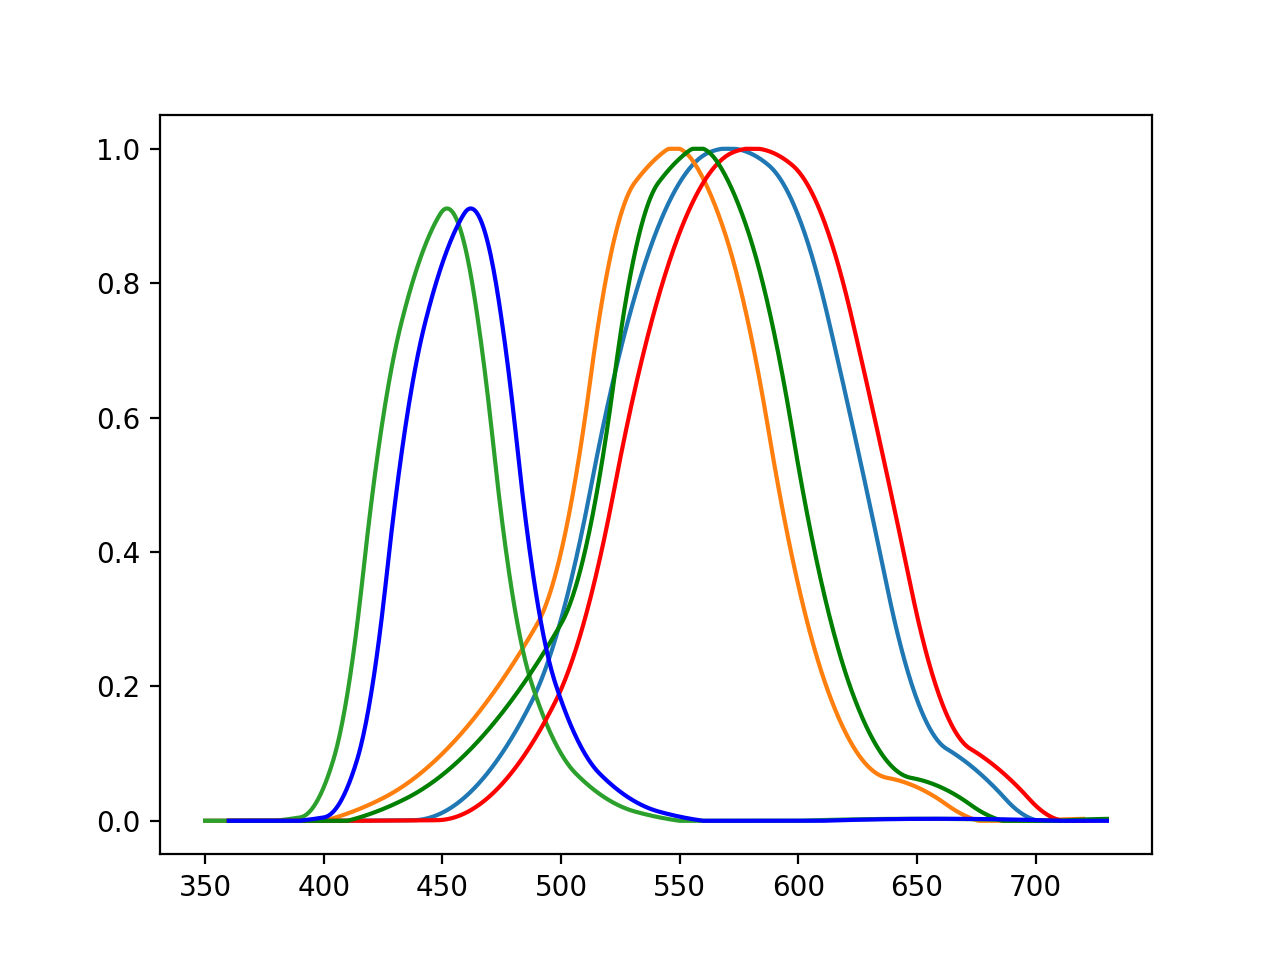

In [46]:
plt.figure()

plt.plot(lmbda,r[0,:])
plt.plot(lmbda,r[1,:])
plt.plot(lmbda,r[2,:])

plt.plot(lmbda +10,cL, 'red')
plt.plot(lmbda+10,cM, 'green')
plt.plot(lmbda+10,cS, 'blue')

plt.show()

In [76]:
import geomstats as gs

INFO: Using pytorch backend


In [107]:
sphere = gs.geometry.hypersphere.Hypersphere(2-1)

In [111]:
f = sphere.random_uniform(100)

In [112]:
f.shape

torch.Size([100, 2])

In [121]:
fp = sphere.extrinsic_to_intrinsic_coords(f)
ff = sphere.intrinsic_to_extrinsic_coords(fp)

<IPython.core.display.Javascript object>


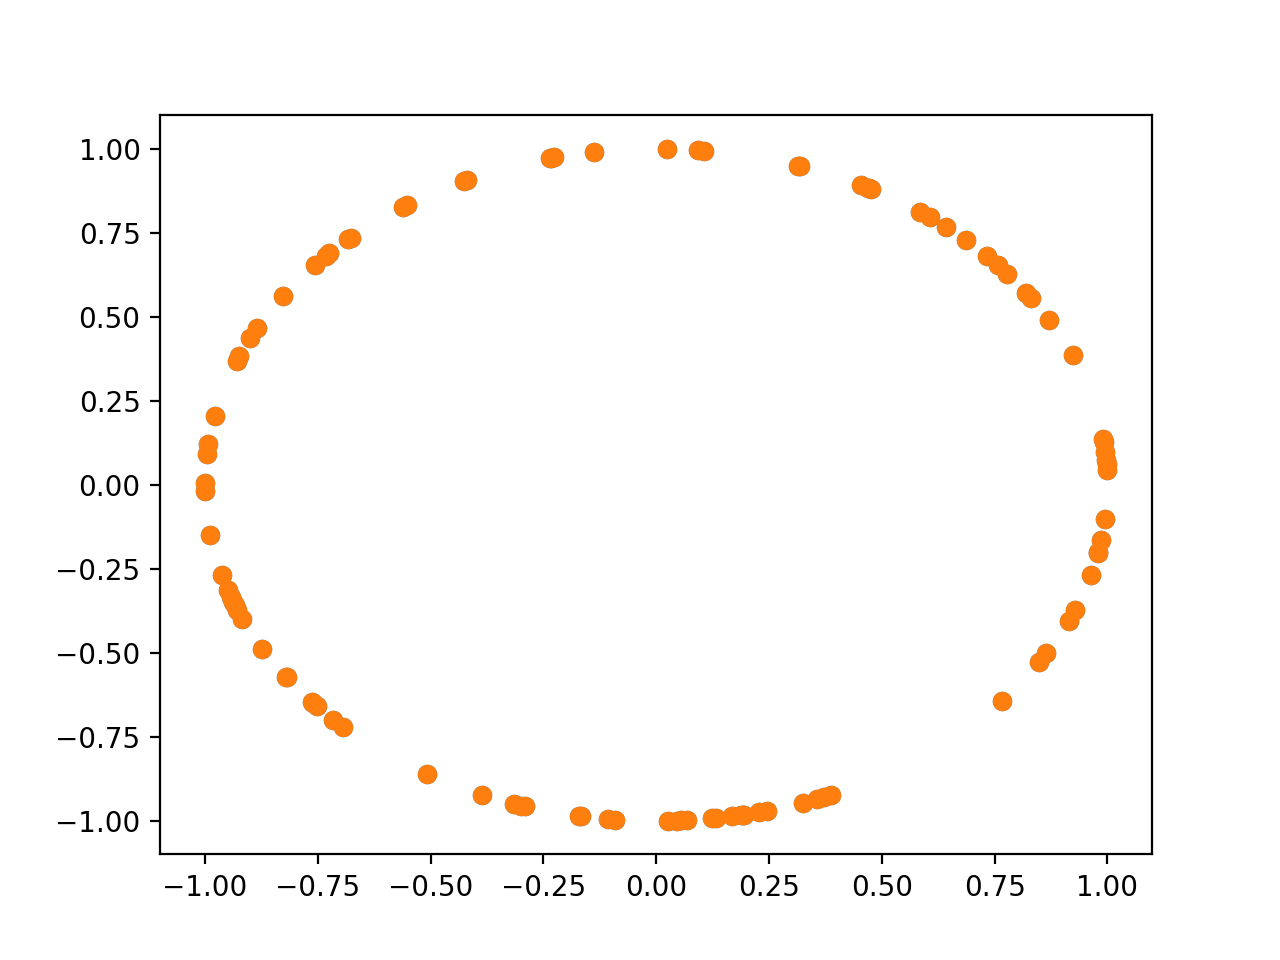

In [122]:
plt.figure()
plt.scatter(f[:,0],f[:,1])
plt.scatter(f[:,0],f[:,1])
plt.show()